In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import numpy as np
import os
import json

from matplotlib import cm
import sympy
import pandas as pd
from sympy import *
import json
import matplotlib.gridspec as gridspec
from celluloid import Camera
import os
from sympy.core.rules import Transform
import itertools
from textwrap import wrap

In [10]:
import scienceplots
plt.style.use(['science', 'notebook'])
#plt.style.use('science')

In [3]:
parentdir = f"../../Output/Feynman_3_trials"
dirs = dict(
    monitor=parentdir+"/monitor.json",
    data=parentdir+"/data"
)

# Data from Trials

In [4]:
import json
import numpy as np
import os
import pandas as pd

# Jobs:
#  - Go trough all seeds that are marked as "finished" and calc all needed stats
#  - Maybe make graphs

# read monitor json
with open(dirs["monitor"], 'r') as f:
    monitor = json.load(f)

last_n_list = pd.DataFrame(columns=["seed", "random", 'combinatory', 'std', 'complexity-std', 'loss-std'])
for seed in monitor["seeds"].items():
    NaN = False
    seed_num = seed[0]
    seed_algos = seed[1]["progress"]
    if seed[1]["status"] == "finished":
        algo_dict = dict()
        algo_dict["seed"] = [seed_num]
        for algo in seed_algos.keys():
            path = f'{dirs["data"]}/{seed_num}/{algo}'
            with open(path+"/parameters.json", 'r') as f:
                parameters = json.load(f)
            algo_dict[algo] = parameters["last_n"]
            if parameters["last_n"] == 400 - 1:
                NaN = True
                break
        if NaN:
            continue
        last_n_list = pd.concat([last_n_list, pd.DataFrame.from_dict(algo_dict)], axis=0)
last_n_list = last_n_list.reset_index(drop=True)
#print(last_n_list)

for column in last_n_list.reset_index(drop=True):
    if column == "seed":
        continue
    algo_df = last_n_list[column].reset_index(drop=True)
    #last_n_list[column+" efficiency"] = last_n_list["random"].astype('int32').reset_index(drop=True) / algo_df.astype('int32')
    last_n_list[column+" efficiency"] = last_n_list["random"].astype('int32').reset_index(drop=True).div(algo_df.astype('int32').values)

In [5]:
print(last_n_list)

   seed random combinatory std complexity-std loss-std  random efficiency  \
0     0    132          27  25             13       41                1.0   
1     9    348         150  27             23       53                1.0   
2    10     47         119  18             16       62                1.0   
3    11    118          25  36             29       42                1.0   
4    12     36          65  18             35       19                1.0   
..  ...    ...         ...  ..            ...      ...                ...   
81   95     65          36  23             57       58                1.0   
82   96     56          13  32             22       19                1.0   
83   97     54          20  44             21       18                1.0   
84   98     89          18  36             27       36                1.0   
85   99     52          24  14             24       25                1.0   

    combinatory efficiency  std efficiency  complexity-std efficiency  \
0 

In [6]:
last_n_list.describe()

,random efficiency,combinatory efficiency,std efficiency,complexity-std efficiency,loss-std efficiency
count,86.0,86.000000,86.000000,86.000000,86.000000
mean,1.0,4.552832,4.733942,5.100124,4.330148
std,0.0,3.420968,3.920060,4.264354,3.408606
min,1.0,0.080645,0.294118,0.250000,0.142857
25%,1.0,2.168103,1.977941,2.260215,1.921053
50%,1.0,3.670833,3.602627,3.853853,3.243421
75%,1.0,5.876050,6.673128,6.944444,6.202991
max,1.0,14.615385,22.300000,22.600000,19.000000


In [7]:
last_n_list.median()

seed                         55.500000
random                       82.000000
combinatory                  23.000000
std                          24.000000
complexity-std               23.000000
loss-std                     25.500000
random efficiency             1.000000
combinatory efficiency        3.670833
std efficiency                3.602627
complexity-std efficiency     3.853853
loss-std efficiency           3.243421
dtype: float64

In [8]:
last_n_list.iloc[:, : 6].median()

seed              55.5
random            82.0
combinatory       23.0
std               24.0
complexity-std    23.0
loss-std          25.5
dtype: float64

# Plotting the Trials

## Density Plots

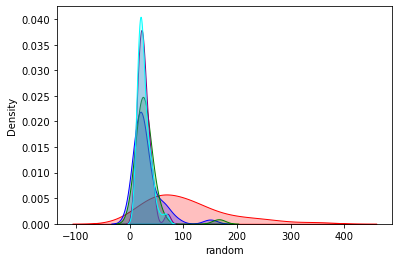

In [40]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

df = last_n_list
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['random'], shade=True, color="r")
fig = sns.kdeplot(df['combinatory'], shade=True, color="b")
fig = sns.kdeplot(df['std'], shade=True, color="g")
fig = sns.kdeplot(df['complexity-std'], shade=True, color="purple")
fig = sns.kdeplot(df['loss-std'], shade=True, color="cyan")
plt.show()

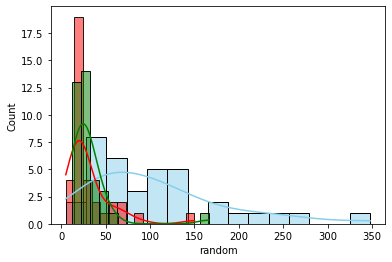

In [41]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

df = last_n_list
 
# plotting both distibutions on the same figure
sns.histplot(data=df, x="random", color="skyblue", label="Sepal Length", kde=True, bins=15)
sns.histplot(data=df, x="combinatory", color="red", label="Sepal Width", kde=True, bins=15)
sns.histplot(data=df, x="std", color="green", label="Sepal Width", kde=True, bins=15)
plt.show()

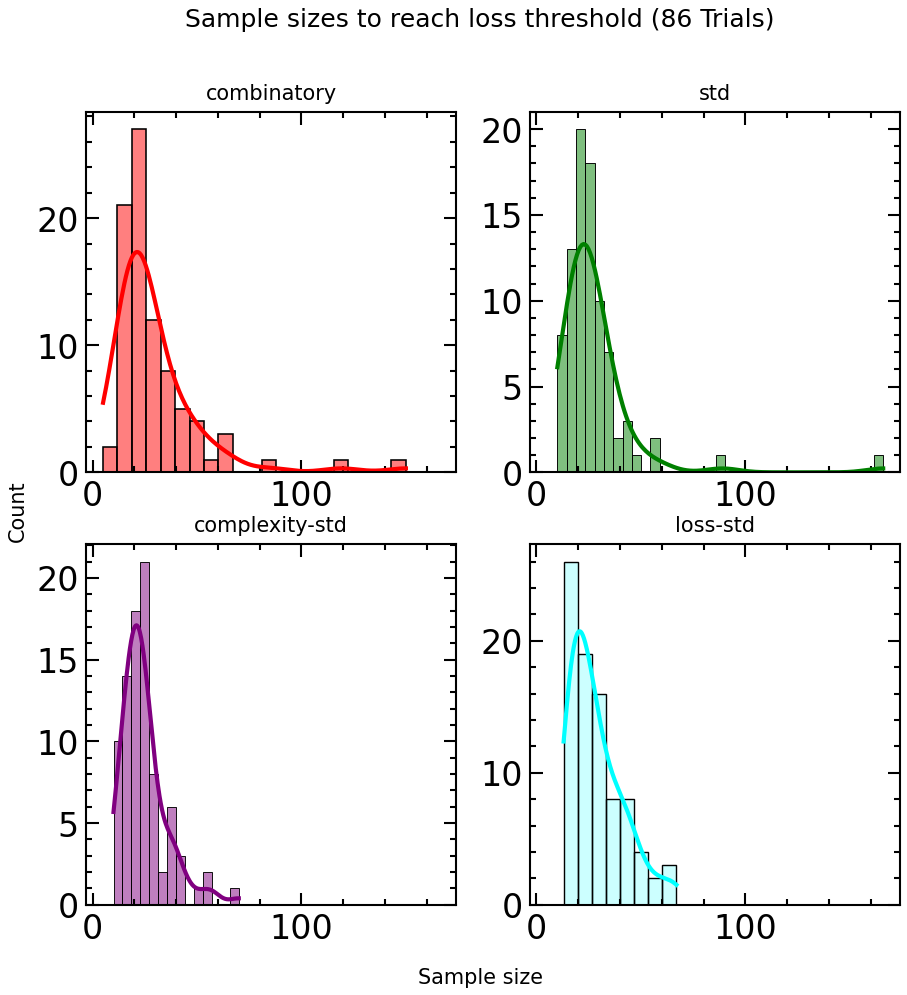

In [15]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
fontsize=10
df = last_n_list
fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharex=True, dpi=150)
# plotting both distibutions on the same figure
#sns.histplot(data=df["random"], color="blue", label="random", kde=False, ax=axs[0, 0],alpha=0.1)
sns.histplot(data=df["combinatory"], color="red", label="combinatory", kde=True, ax=axs[0, 0])
sns.histplot(data=df["std"], color="green", label="std", kde=True, ax=axs[0, 1])
sns.histplot(data=df["complexity-std"], color="purple", label="complexity-std", kde=True, ax=axs[1, 0])
sns.histplot(data=df["loss-std"], color="cyan", label="loss-std", kde=True, ax=axs[1, 1], alpha=0.2)
axs[0, 0].xaxis.set_tick_params(which='both', labelbottom=True)
axs[0, 1].xaxis.set_tick_params(which='both', labelbottom=True)
Title_dict = {"00":"combinatory","01":"std","10":"complexity-std","11":"loss-std"}
for i in range(2):
    for j in range(2):
        #sns.histplot(data=df["random"], color="blue", label="random", kde=True, ax=axs[i, j], alpha=0.05)
        axs[i,j].set_title(Title_dict[f"{i}{j}"], fontsize=fontsize)
        axs[i,j].set(xlabel=None)
        axs[i,j].set(ylabel=None)
fig.text(0.5, 0.05, 'Sample size', ha='center')
fig.text(0.05, 0.5, 'Count', va='center', rotation='vertical')

#fig.text(0.5, 0.93, 'Compared to random sampling (blue)', ha='center', fontsize=8)
fig.suptitle(f"Sample sizes to reach loss threshold ({df.shape[0]} Trials)")
plt.show()

## Boxplot

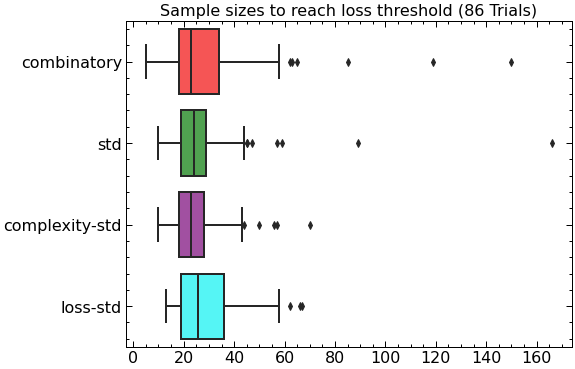

In [38]:
#df = last_n_list[['random', 'combinatory', 'std', 'complexity-std', 'loss-std']]
df = last_n_list[['combinatory', 'std', 'complexity-std', 'loss-std']]
my_pal = {"random": "b", "combinatory": "r", "std":"g", "complexity-std": "purple", "loss-std": "cyan"}
ax = sns.boxplot(data=df, orient="h", palette=my_pal, saturation=0.9)
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))
plt.title(f"Sample sizes to reach loss threshold ({df.shape[0]} Trials)")
plt.show()